In [1]:
import os
labels=os.listdir('../input/165-different-snakes-species/train')
print(len(labels))

135


In [2]:
!pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully unin

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
import random
import os
import cv2
from tqdm import tqdm
import time
import copy
from PIL import Image
import joblib

2024-11-24 05:29:29.947746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 05:29:29.947809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 05:29:29.949530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

device = "gpu" if tf.config.experimental.list_physical_devices('GPU') else "cpu"
print("Using device:", device)

lr = 0.001
epochs = 10
batch_size = 16
gamma = 0.5

csv_combine = pd.read_csv("../input/165-different-snakes-species/Csv/train.csv")
csv_test = pd.read_csv("../input/165-different-snakes-species/Csv/test.csv") 
image_dim = 480


Using device: gpu


In [5]:
class_id = {}
for i,cl in enumerate(csv_combine.class_id.unique()):
    class_id[cl] = i
nclass = i+1
label=[]
i=0

print(nclass)
print(class_id)


135
{18: 0, 20: 1, 25: 2, 26: 3, 39: 4, 41: 5, 48: 6, 52: 7, 54: 8, 57: 9, 60: 10, 65: 11, 71: 12, 73: 13, 83: 14, 87: 15, 88: 16, 99: 17, 110: 18, 111: 19, 113: 20, 114: 21, 122: 22, 135: 23, 140: 24, 155: 25, 158: 26, 159: 27, 162: 28, 163: 29, 165: 30, 168: 31, 169: 32, 175: 33, 177: 34, 180: 35, 185: 36, 186: 37, 188: 38, 189: 39, 191: 40, 193: 41, 195: 42, 203: 43, 215: 44, 216: 45, 220: 46, 226: 47, 238: 48, 255: 49, 263: 50, 280: 51, 284: 52, 302: 53, 315: 54, 319: 55, 321: 56, 323: 57, 335: 58, 338: 59, 345: 60, 348: 61, 352: 62, 360: 63, 363: 64, 364: 65, 368: 66, 373: 67, 381: 68, 383: 69, 384: 70, 396: 71, 422: 72, 424: 73, 427: 74, 429: 75, 430: 76, 441: 77, 448: 78, 453: 79, 454: 80, 457: 81, 462: 82, 464: 83, 470: 84, 474: 85, 477: 86, 481: 87, 485: 88, 495: 89, 497: 90, 507: 91, 515: 92, 544: 93, 545: 94, 546: 95, 560: 96, 562: 97, 575: 98, 576: 99, 578: 100, 590: 101, 603: 102, 605: 103, 609: 104, 616: 105, 617: 106, 619: 107, 623: 108, 628: 109, 629: 110, 634: 111, 651

In [6]:
import numpy as np  # If you're using numpy arrays for label

# Assuming you have the number of unique classes stored in a variable called num_classes
num_classes = len(csv_combine['class_id'].unique())

# Initialize the label array with the appropriate size
label = np.empty(num_classes, dtype=object)

# Enumerate unique values and assign them as labels
for i, cl in enumerate(csv_combine['class_id'].unique()):
    label[i] = cl
print(label)

[18 20 25 26 39 41 48 52 54 57 60 65 71 73 83 87 88 99 110 111 113 114 122
 135 140 155 158 159 162 163 165 168 169 175 177 180 185 186 188 189 191
 193 195 203 215 216 220 226 238 255 263 280 284 302 315 319 321 323 335
 338 345 348 352 360 363 364 368 373 381 383 384 396 422 424 427 429 430
 441 448 453 454 457 462 464 470 474 477 481 485 495 497 507 515 544 545
 546 560 562 575 576 578 590 603 605 609 616 617 619 623 628 629 634 651
 652 656 672 674 675 678 686 690 691 696 698 699 701 725 738 740 741 746
 747 751 755 758]


In [7]:
csv_train = csv_combine
train_size = len(csv_train)
test_size = len(csv_test)

Found 26120 images belonging to 135 classes.
Found 26120 images belonging to 135 classes.
Found 3138 images belonging to 135 classes.


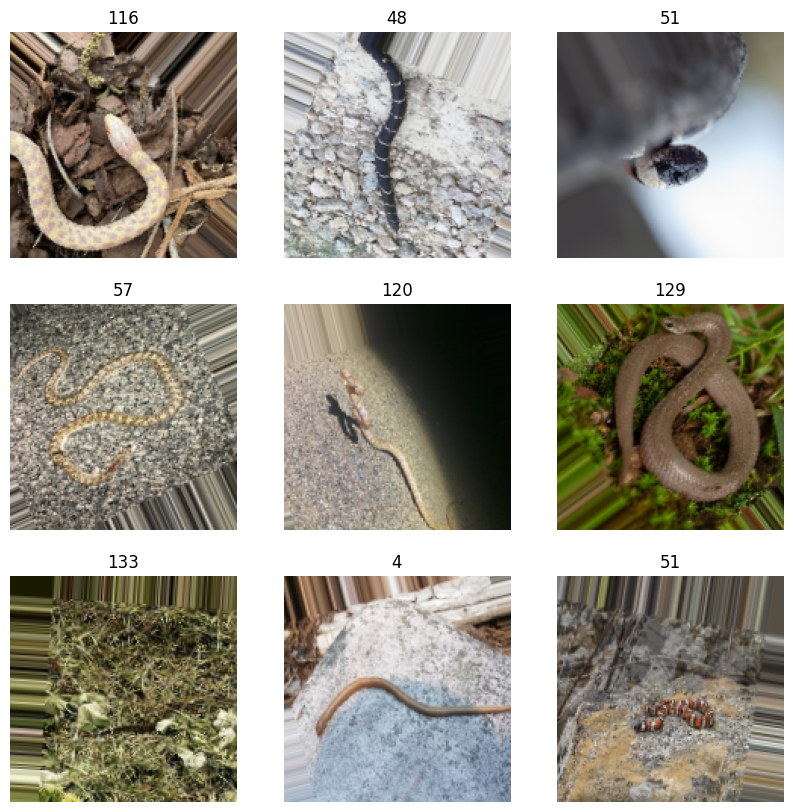

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image transformations for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

# Define image transformations for normal images
datagen_normal = ImageDataGenerator(rescale=1./255)

# Define the directories for train and test datasets
train_dir = "../input/165-different-snakes-species/train/"
test_dir = "../input/165-different-snakes-species/test/"

# Load the training datasets
train_dataset_aug = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

train_dataset_normal = datagen_normal.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

# Load the test datasets
test_dataset = datagen_normal.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

def alternate_datasets(dataset1, dataset2):
    while True:
        yield next(dataset1)
        yield next(dataset2)

# Create a new generator that will alternate between the two datasets
# Combine the generators using zip and map to alternate between them
train_dataset = tf.data.Dataset.zip((
    tf.data.Dataset.from_generator(lambda: train_dataset_aug, output_types=(tf.float32, tf.float32)),
    tf.data.Dataset.from_generator(lambda: train_dataset_normal, output_types=(tf.float32, tf.float32))
)).flat_map(lambda aug, normal: tf.data.Dataset.from_tensors(aug).concatenate(tf.data.Dataset.from_tensors(normal)))


# Display a batch of images
import matplotlib.pyplot as plt
import numpy as np

def display_images(dataset):
    x, y = next(iter(dataset))
    # x = x.numpy()  # Remove this line
    # y = y.numpy()  # Remove this line if 'y' is also a numpy array

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        plt.title(np.argmax(y[i]))
        plt.axis("off")


display_images(train_dataset)



In [9]:
# Convert labels to integers
labels = [int(label) for label in labels]

# Now you can proceed with label mapping and one-hot encoding


In [10]:
from tensorflow.keras.utils import to_categorical

# Assuming you have a dictionary named class_id_mapping
class_id_mapping = {class_id: idx for idx, class_id in enumerate(sorted(csv_combine['class_id'].unique()))}

# Map labels to valid indices using the class_id_mapping dictionary
mapped_labels = [class_id_mapping[class_id] for class_id in labels]

# Convert integer-encoded labels to one-hot encoded format
train_labels_one_hot = to_categorical(mapped_labels, num_classes=num_classes)
val_labels_one_hot = to_categorical(mapped_labels, num_classes=num_classes)


In [11]:
import numpy as np
'''
# Assuming you have a DirectoryIterator object for your training data named train_iterator
# and you have specified a batch size named batch_size

# Calculate the number of samples in the training set
num_samples = train_dataset.samples

# Calculate the number of batches
num_batches = int(np.ceil(num_samples / batch_size))

print("Number of samples:", num_samples)
print("Number of batches:", num_batches)
'''
# Calculate the number of samples in the training set
num_samples_aug = len(train_dataset_aug) * batch_size
num_samples_normal = len(train_dataset_normal) * batch_size
total_num_samples = num_samples_aug + num_samples_normal
# Calculate the number of batches in the training set
num_batches_aug = len(train_dataset_aug)
num_batches_normal = len(train_dataset_normal)
total_num_batches = num_batches_aug + num_batches_normal


print(total_num_samples)
print(total_num_batches)


52256
3266


In [12]:
import numpy as np

# Assuming you have a DirectoryIterator object for your training data named train_iterator
# and you have specified a batch size named batch_size

# Calculate the number of samples in the training set
num_test = test_dataset.samples

# Calculate the number of batches
num_batches_test = int(np.ceil(num_test / batch_size))

print("Number of samples:", num_test)
print("Number of batches:", num_batches_test)

Number of samples: 3138
Number of batches: 197


In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# Path to the locally downloaded weights file 
weights_path = '/kaggle/input/efficientnetb4_notop.h5/tensorflow2/default/1/efficientnetb4_notop.h5'

# Load the pre-trained model
base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights=weights_path)


In [14]:
import tensorflow as tf
from tensorflow.keras import layers

# Path to the locally downloaded weights file
weights_path = '/kaggle/input/efficientnetb4_notop.h5/tensorflow2/default/1/efficientnetb4_notop.h5'

# Load the pre-trained model
base_model = tf.keras.applications.EfficientNetB4(include_top=False, weights=weights_path)

# Add a new top layer
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
predictions = layers.Dense(nclass, activation='softmax')(x)

# This is the model we will train
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with categorical crossentropy loss and categorical accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch % 3 == 0:
        return lr * gamma
    else:
        return lr

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Train the model using the prepared datasets
model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, steps_per_epoch=total_num_batches,
          validation_steps=num_batches_test, callbacks=[callback])


Epoch 1/10


2024-11-24 05:30:22.996527: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1732426229.536550      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3266/3266 [==============================] - 619s 170ms/step - loss: 3.3520 - categorical_accuracy: 0.2096 - val_loss: 9.0638 - val_categorical_accuracy: 0.0070 - lr: 5.0000e-04
Epoch 2/10
3266/3266 [==============================] - 469s 144ms/step - loss: 2.4798 - categorical_accuracy: 0.3676 - val_loss: 6.2557 - val_categorical_accuracy: 0.0051 - lr: 5.0000e-04
Epoch 3/10
3266/3266 [==============================] - 468s 143ms/step - loss: 2.0764 - categorical_accuracy: 0.4522 - val_loss: 84.4075 - val_categorical_accuracy: 0.0076 - lr: 5.0000e-04
Epoch 4/10
3266/3266 [==============================] - 469s 144ms/step - loss: 1.4481 - categorical_accuracy: 0.6014 - val_loss: 7.0029 - val_categorical_accuracy: 0.0115 - lr: 2.5000e-04
Epoch 5/10
3266/3266 [==============================] - 474s 145ms/step - loss: 1.1667 - categorical_accuracy: 0.6757 - val_loss: 33.4859 - val_categorical_accuracy: 0.0061 - lr: 2.5000e-04
Epoch 6/10
3266/3266 [==============================] - 474s 145

In [15]:
import tensorflow as tf

# Assuming you have loaded the model and created the necessary datasets

# Get the problematic layer
layer = model.get_layer("block2b_bn")

# Get the input and output shapes
input_shape = layer.input_shape
output_shape = layer.output_shape

# Print the shapes
print(f"Input shape: {input_shape}")
print(f"Output shape: {output_shape}")

Input shape: (None, None, None, 192)
Output shape: (None, None, None, 192)


In [16]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [17]:
model.save('model.keras')

In [18]:
model.save('/kaggle/working/model.keras')

In [19]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('/kaggle/working/model.keras')

test_loss, test_accuracy=model.evaluate(test_dataset)
print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

197/197 [==============================] - 16s 58ms/step - loss: 5.6499 - categorical_accuracy: 0.2336
Test Loss:  5.649877548217773
Test Accuracy:  0.23358827829360962


In [20]:
predictions=model.predict(test_dataset)

197/197 [==============================] - 14s 57ms/step


In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels=[]
for i in range(len(test_dataset)):
  true_labels.extend(np.argmax(test_dataset[i][1],axis=1))

predicted_labels=np.argmax(predictions,axis=1)

conf_matrix=confusion_matrix(true_labels,predicted_labels)

print("Confusion Matrix: ")
print(conf_matrix)

Confusion Matrix: 
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


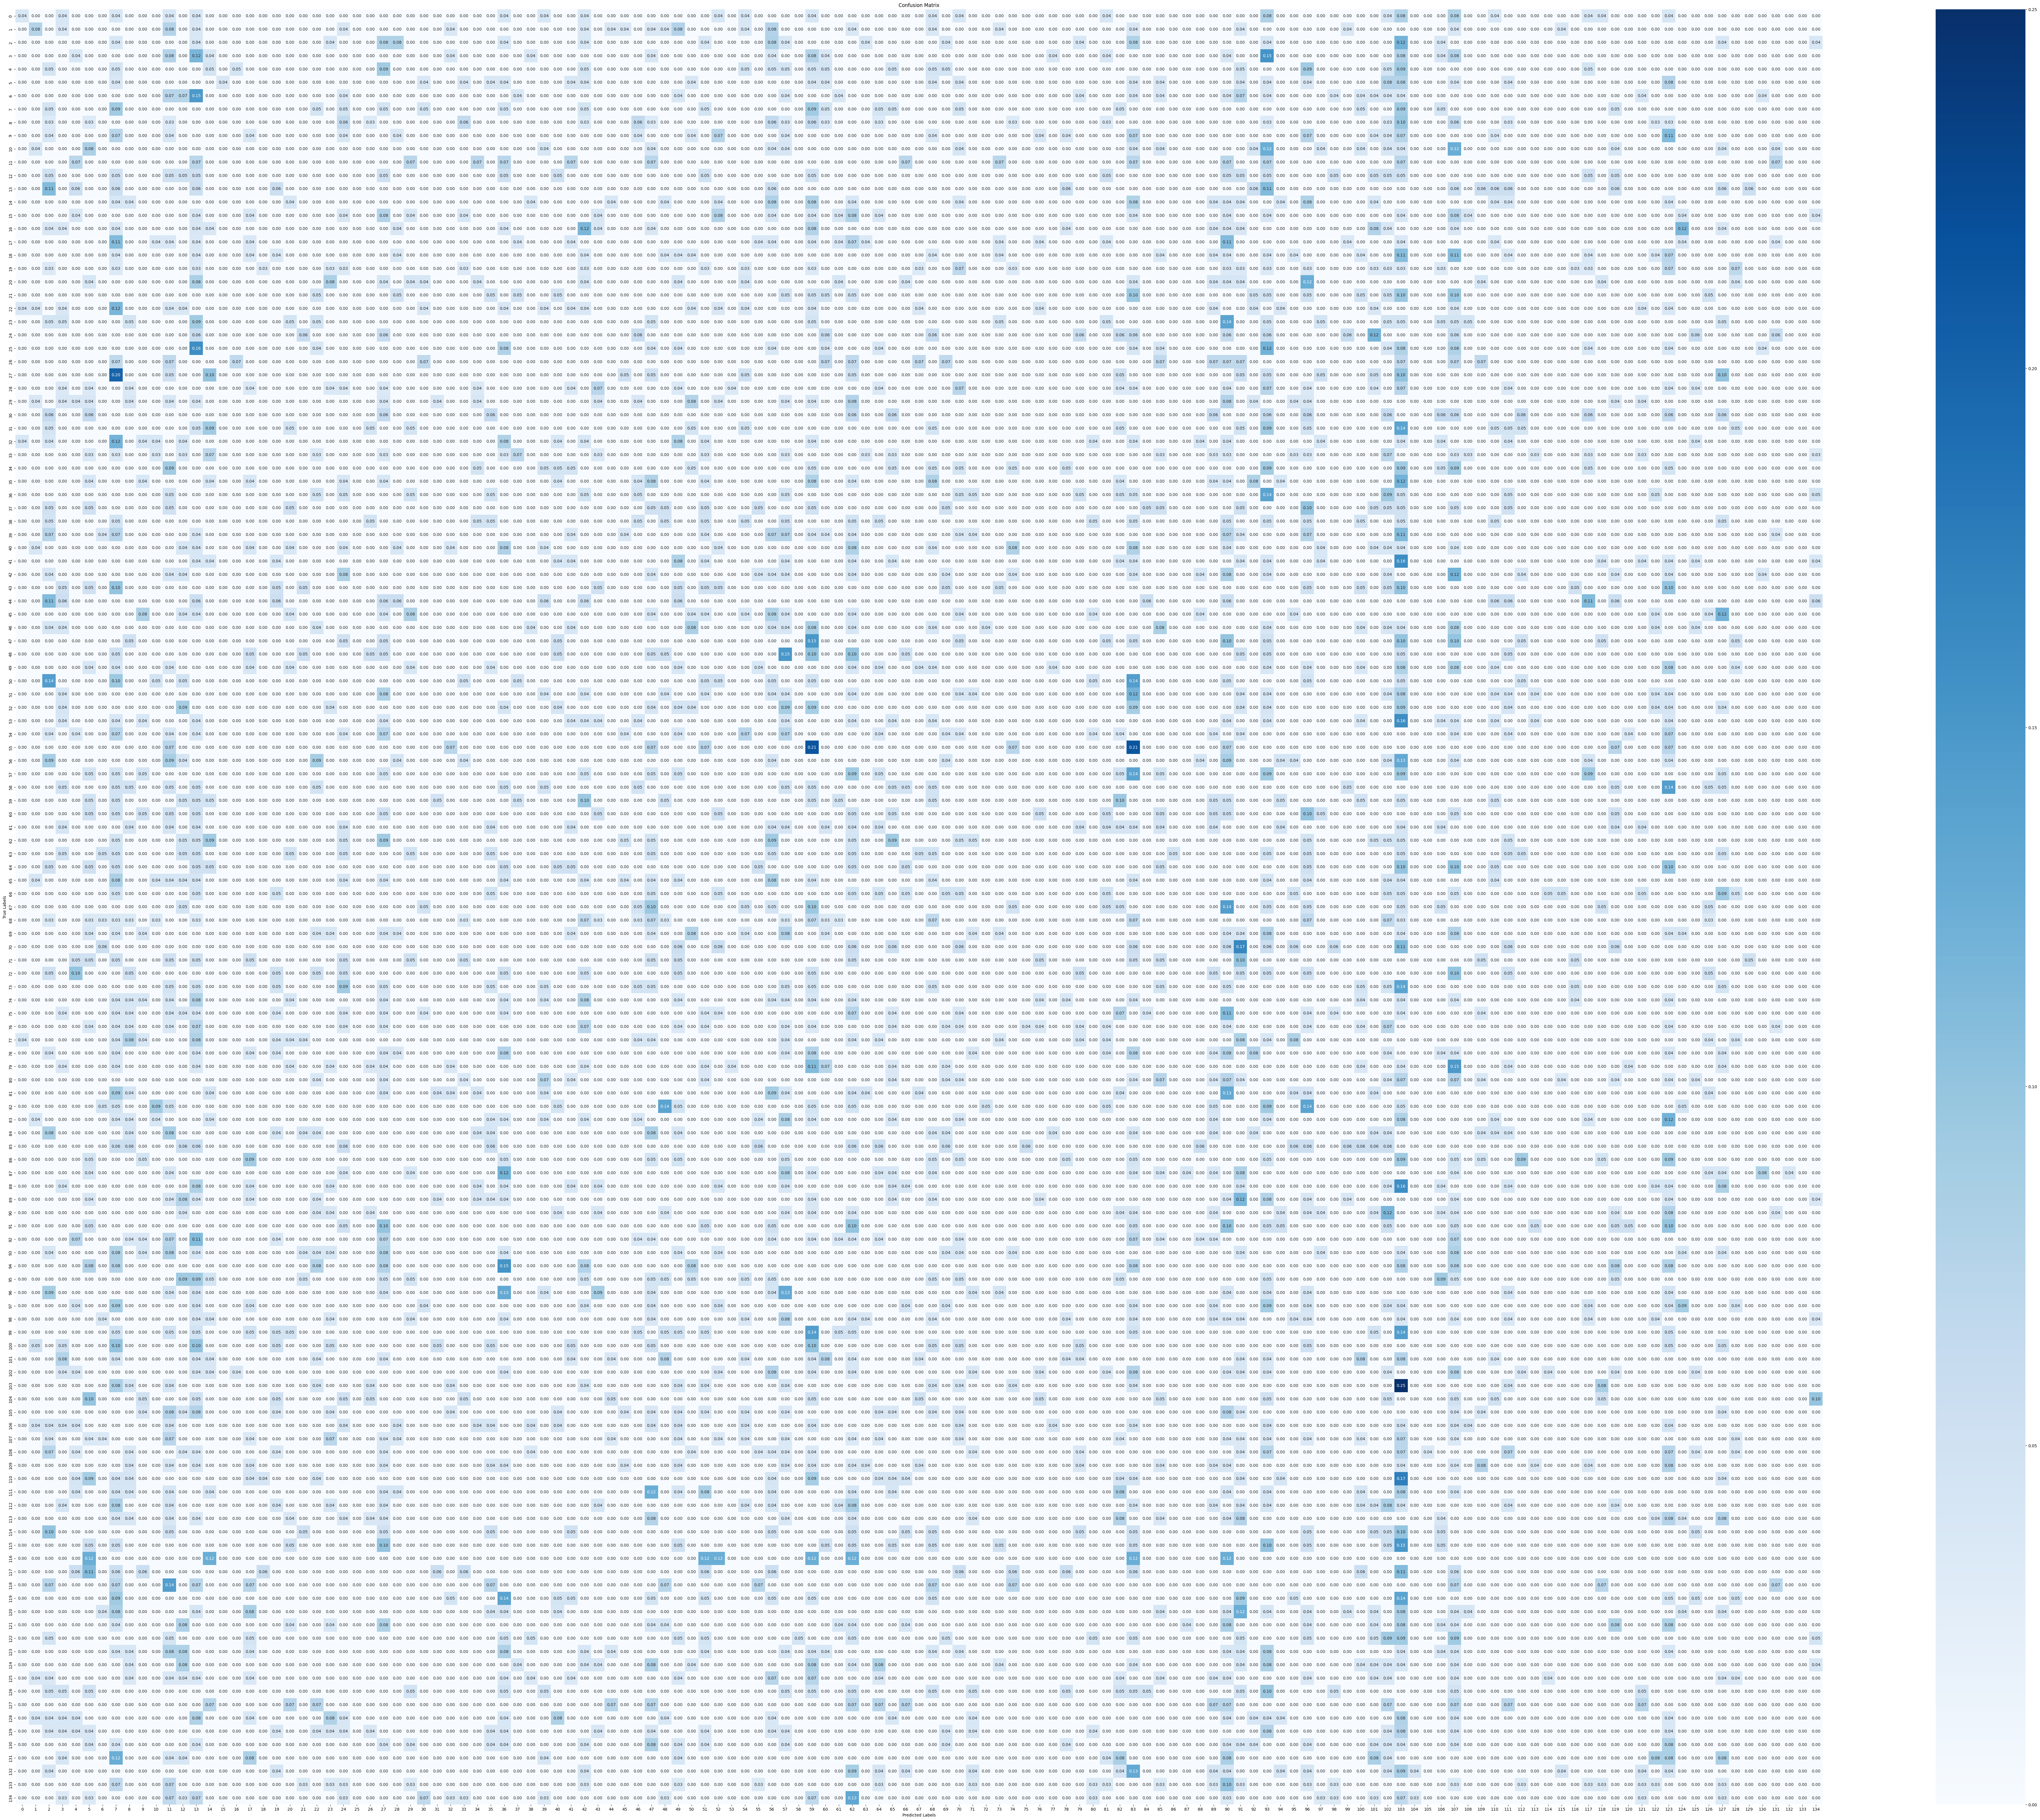

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix=conf_matrix.astype("float")/conf_matrix.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(100,80))
sns.heatmap(conf_matrix,annot=True,fmt='.2f',cmap="Blues",xticklabels=range(nclass),yticklabels=range(nclass))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()